# Project: Investigate a Dataset (No_Show Appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset used for this analysis is the No_show_appointment. This dataset is a record of patients who scheduled for an appointment, some showed up while others did not show up. It comprises of details of the scheduled date, appointment day, the medical condition of the patient, the neighbourhood, age of the patients and others. This research seeks to provide an analysis between the patient showing up or not and other dependent variables. 

#### Questions to be analyzed are:

1. Investigate those who showed up and did not for the appointment.
2. Does receiving an SMS affect the showing up of patients for the appointment?
3. Did the neighbourhood have an effect on the patients showing up for the appointment?
4. Did the age of the patient have any influence on them showing up or not.

In [78]:
# import packages to use

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [3]:
# load dataset
df = pd.read_csv('no_show_appointment.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# get shaoe of dataset
df.shape

(110527, 14)

In [6]:
# get the datatype of each column and check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [12]:
# describes each column in terms of mean, std, min.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PatientId,110527.0,1.474963e+14,2.560949e+14,3.921784e+04,4.172614e+12,3.173184e+13,9.439172e+13,9.999816e+14
AppointmentID,110527.0,5.675305e+06,7.129575e+04,5.030230e+06,5.640286e+06,5.680573e+06,5.725524e+06,5.790484e+06
Age,110527.0,3.708887e+01,2.311020e+01,-1.000000e+00,1.800000e+01,3.700000e+01,5.500000e+01,1.150000e+02
Scholarship,110527.0,9.826558e-02,2.976748e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hipertension,110527.0,1.972459e-01,3.979213e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,110527.0,7.186479e-02,2.582651e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,110527.0,3.039981e-02,1.716856e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handcap,110527.0,2.224796e-02,1.615427e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
SMS_received,110527.0,3.210256e-01,4.668727e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [8]:
# check for missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [131]:
# check datatype of each column
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [9]:
# check for duplicate values
df.duplicated().sum()

0

In [10]:
# check for unique values
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

### Description of Codes above

* The dataset (no_show appointment) shows the list of 110,527 patients who schedueld for an appointment with the doctor. It was observed that some patients did not show up for the appointment on the appointment day.

This analysis is carried out in order to investigate the relationship between the patient showing up or not and other dependent variables.

**Properties of the DataSet**

1. The data comprises of 110,527(row), each row describing a patient's details and 14 features (columns).

2. There are no duplicate or missing values in the dataset.

3. By checking for unique values in each column, it was observed that the patientID column shows 62299 unique patientIDs admist the 110,527 scheduled appointment, this signifies that a patient scheduled for more than one appointment since two patients cannot have the same ID.

4. The dataset comprises of 81 unique values for the Neighbourhood columns. This shows that 110,527 come from 81 neigbourhood. 

### Cleaning Dataset

1. It was observed that the age column has a negative value which can be viewed as an outlier. Nobody's age can be less than 0, it will be investigated and cleaned.

2. Some names in the columns look misspelled, this would be corrected as well. No_show column will be renamed as well to avoid confusion while analyzing.

3. In the NoShow column, the 'No' which implies that the patient showed up will be changed to Yes while the Yes will be changed to No to avoid confusion

4. Dropping of columns not needed.

### Data Cleaning - The points outlined above will be worked on in the codes below for this section.

In [17]:
# renaming of columns

df1 = df.rename(columns = {'Handcap': 'Handicapp', 'Hipertension':'Hypertension', 'PatientId': 'PatientID', 'No-show':"Showed_up"})
df1.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapp,SMS_received,Showed_up
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [18]:
# replacing 'No' with 'Yes' and 'Yes' with 'No'

df1['Showed_up'] = df1['Showed_up'].replace(['No','Yes'], ['Yes', 'No'])
df1

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapp,SMS_received,Showed_up
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,Yes
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,Yes
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,Yes
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,Yes


In [21]:
# Restructuring the ScheduledDay and AppointmentDay to only print out date since the timing for the appointment day all showed 00:00:00

df1['AppointmentDay'] = pd.to_datetime(df.AppointmentDay)
df1['AppointmentDay'] = df1['AppointmentDay'].dt.date

df1['ScheduledDay'] = pd.to_datetime(df.ScheduledDay)
df1['ScheduledDay'] = df1['ScheduledDay'].dt.date
df1.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapp,SMS_received,Showed_up
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


In [48]:
# locating row with negative value and replacing it

min_age_loc = df1.loc[df1['Age'] == df1['Age'].min()]
replace_value = df1.Age.replace(-1, 0, inplace=True)


In [46]:
# print row with mininum value to check
min_age_loc

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapp,SMS_received,Showed_up
59,7.184428e+13,5638545,F,2016-04-29,2016-04-29,0,CONQUISTA,0,0,0,0,0,0,Yes
63,2.366233e+14,5628286,M,2016-04-27,2016-04-29,0,SÃO BENEDITO,0,0,0,0,0,0,Yes
64,1.885174e+14,5616082,M,2016-04-25,2016-04-29,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,Yes
65,2.718818e+14,5628321,M,2016-04-27,2016-04-29,0,CONQUISTA,0,0,0,0,0,0,Yes
67,8.647128e+13,5639264,F,2016-04-29,2016-04-29,0,NOVA PALESTINA,0,0,0,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16,2016-06-01,0,RESISTÊNCIA,0,0,0,0,0,0,Yes
110346,5.577525e+12,5777724,M,2016-06-06,2016-06-08,0,RESISTÊNCIA,0,0,0,0,0,0,Yes
110454,6.142460e+11,5772400,F,2016-06-03,2016-06-03,0,RESISTÊNCIA,0,0,0,0,0,0,Yes
110460,4.321846e+13,5769545,F,2016-06-03,2016-06-03,0,RESISTÊNCIA,0,0,0,0,0,0,Yes


In [132]:
df1.drop('PatientID', axis=1, inplace=True)

In [133]:
# print dataset
df1.head()

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapp,SMS_received,Showed_up
0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Investigating those who showed up and did not show up)

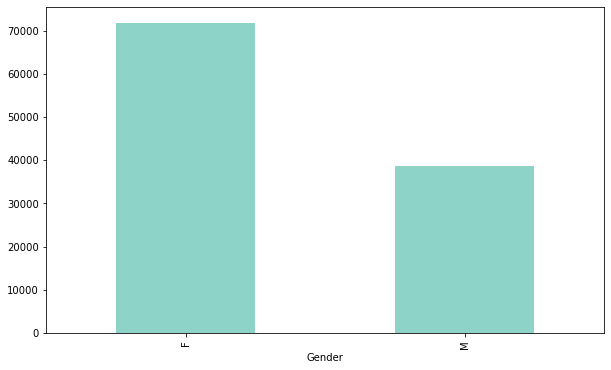

In [139]:
# group patients by gender
df1.groupby('Gender').size().plot(kind='bar', figsize=(10,6), colormap='Set3');

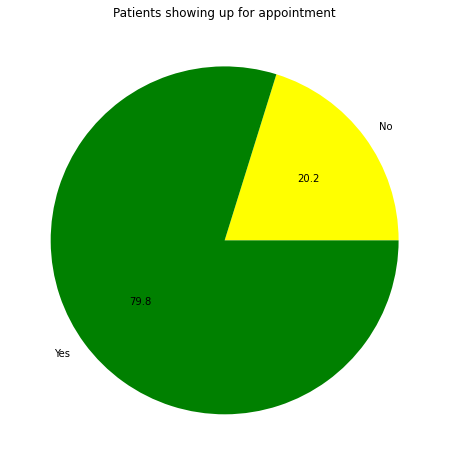

In [65]:
# group patients by showing up for appointment
df1.groupby('Showed_up').size().plot(kind='pie', autopct='%.1f',colors = ['yellow', 'green'], 
                                  title='Patients showing up for appointment', figsize=(8, 8));
plt.ylabel("");

**From the charts above:**

1. The percentage of scheduled appointment is higher for the females, this shows that majority of the patients who scheduled for the appointment were females.

2. 79.8% of people who scheduled for the appointment showed up leaving 20.2% percent left, this will be further investigated.

### Research Question 2  (Investing whether receiving a message affects a patient showing up for the appointment or not.)

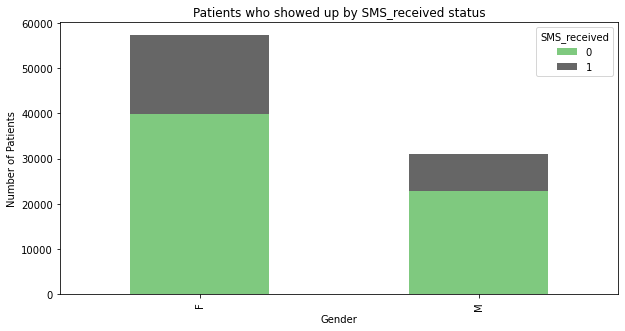

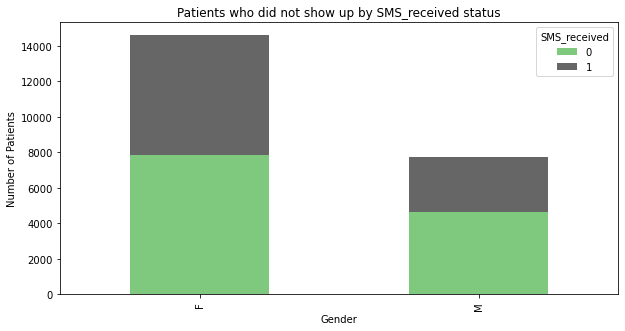

In [77]:
# plot graphs of patients based on sms received

def plot_graph(query, title):
    pd.crosstab(query['Gender'], query['SMS_received']).plot(kind='bar', stacked=True, figsize=(10,5), colormap="Accent");
    plt.ylabel("Number of Patients");
    plt.title(f"Patients who {title} up by SMS_received status")


plot_graph(df1.query('Showed_up == "Yes"'), "showed")
plot_graph(df1.query('Showed_up == "No"'), "did not show")

### From the charts above,

***SMS_received (yes) - 1***
***SMS_received (no) - 0***

1. **Patients who showed up:**
    It is observed that few messages were sent to those who showed up, over 60% did not receive any message and still showed up.
  
2. **Patients who did not show up:**
    From the second chart, more patients who did not show up received an sms as compared to those who did not show up for the appointment.
    
**Findings Summary**
Recieving and SMS contributed little to the patients who showed up for the appointment. Since more SMS were recived by patients who did not show up, it will be better to investigate the content of the messages received.

### Research Question 3  (Did the age group have an influence on the patients who showed up and did not show up for the appointment?)

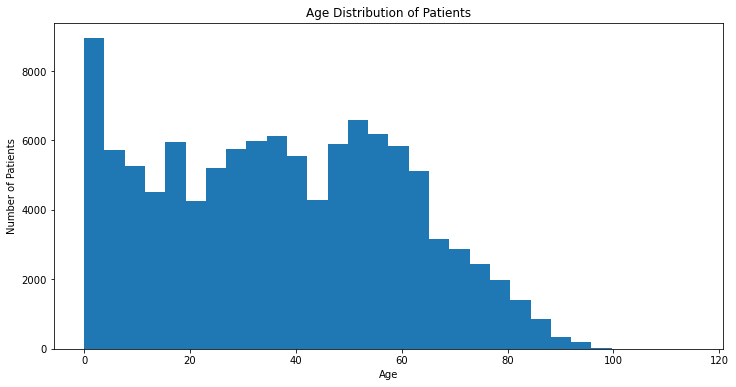

In [157]:
# Age distribution of patients

df1.Age.plot(kind='hist', figsize=(12,6), bins=30);
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title("Age Distribution of Patients");

**The chart above shows the distribution of the patients with respect to their ages. It can be seen that a large number of the patients were within the range of 0 - 1 years. **

A wide range of patients appears between the ages of 14 - 60. As from 70 years, the number of patients began to decrease. This signifies that people who signed up for appointments were more of children and adults while the elderly were less. 

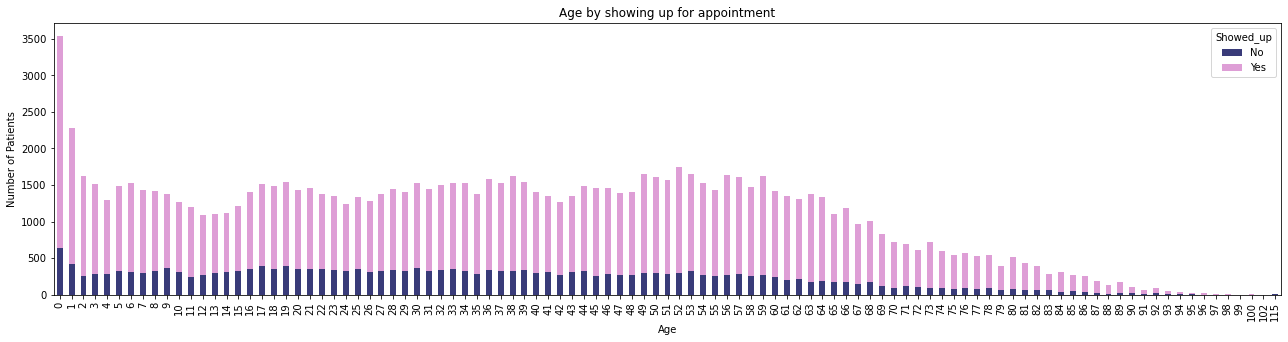

In [109]:
# plot to check the age distribution of the patients that showed up or not

pd.crosstab(df1['Age'], df1['Showed_up']).plot(kind='bar', stacked=True, figsize=(22,5), colormap='tab20b');
plt.title("Age by showing up for appointment")
plt.ylabel("Number of Patients");

***Chart Summary***

The chart above shows the age distribution of the patients who showed up and did not show for the appointment. Among those who did not show up, patients between 70 years and above had lesser number of patients that did not show up for the appointment scheduled. We have more patients within the age of 17 - 60 not showing up for the appointment compared to the rest. 

This showed that Elderly patients who scheduled for the appointment showed up more than the other age range.

### Research Question 4  (Investigating whether patients who benefited from the scholarship showed up more for the appointment)

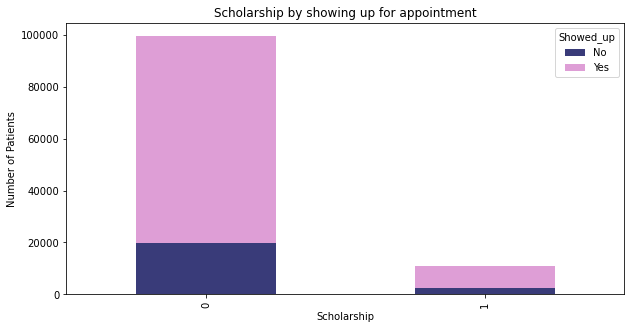

In [114]:
# plot to show patients based on scholarship and showing up for the appointment

pd.crosstab(df1['Scholarship'], df1['Showed_up']).plot(kind='bar', stacked=True, figsize=(10,5), colormap='tab20b');
plt.title("Scholarship by showing up for appointment")
plt.ylabel("Number of Patients");

***Chart Summary***

**Scholarship = 0 indicates that the patients did not receive any scholarship**
**Scholarship = 1 indicates that patients received a scholarship**

Less than 10% of the chart belongs to those who received schlolarhip, perhaps the patients who showed up came because they received scholarships.

In [126]:
# query the dataset for the patients who received scholarship
scholarship_inquire = df1.query('Scholarship == 1')

***Chart Summary
More than 70% of those who received scholarship from each neighbourhood showed up for the appointment. It shows how receiving a scholarship greatly increases the chances of a patient showing up for appointment. Most patient who received the scholarship showed up for the appointment.**


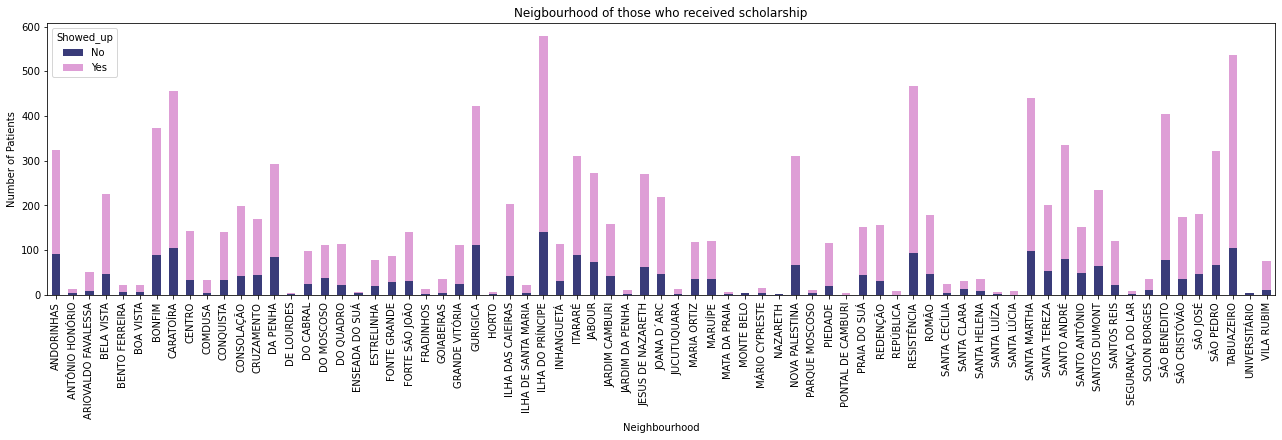

In [125]:
# Further investigation on those who received a scholarship
# neighbourhood of patients who received scholarship to detect if they showed up or not.

pd.crosstab(scholarship_inquire['Neighbourhood'], scholarship_inquire['Showed_up']).plot(kind='bar', stacked=True, figsize=(22,5), colormap='tab20b');
plt.title("Neigbourhood of those who received scholarship")
plt.ylabel("Number of Patients");

### Limitations

1. The dataset failed to provide the timing of the appointment day, this would have helped to analyze the data better. All the time for the appointment day carried a 00:00:00 timing. Some patients might have showed up and probably had to wait in queue. They might have left as a result of this.

2. The handicapp column had values ranging from 0 - 3, instead of just 0 and 1, They may have been some patients that did not show up because they were handicapp but the dataset gave values not precise.

3. Also the distance from the patients house to the hospital should have been provided, this would've helped in determing if the distance contributed to the patient not showing up for the appointment.

## Conclusions

***No_show_appointment dataset contains the list of patients who scheduled for appointment and was given an appointment day to show up. Some showed up while other did not show up. This research investigates those who showed up and did not show up. The research tries to determine if there exists any relationship between the patient showing up or not and other dependent variables such as the neighbourhood, age, scholarship status of the patient.***

The dataset was loaded and checked for any missing values, duplicates and other attributes that might make it unfit for analyzing. After checking and detecting some mess in the dataset, the dataset was cleaned by renaming columns, replacing negative values

From the results obtained after analyzing the chart, it was observed that:

1. More females scheduled for the appointment than males indicating that females probably care more about their health.

2. 20.2% of those who scheduled for the appointment did not show up.

3. Patients within the age of 17-60 are likely not to show up for the appointment while patients more patients within the age of 75 and above were seen to show up more for the scheduled appointment.

4. Receiving an SMS had little influence on those who showed up for the appointment as a majority of the patients did not receive the message but still showed up.

5. More than 70% of patients who received the scholarship showed up for the appointment. This implies that receiving the scholarship increased the number of patient that showed up for the appointment.